# import required library

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math


# Show 2 image plot method

In [34]:
def showImages(oImage, oLabel, cImage, cLabel):
    fig = plt.figure(figsize=(10,7))
    fig.add_subplot(1,2,1)
    plt.imshow(oImage)
    plt.title(oLabel or 'Original Image' )
    fig.add_subplot(1,2,2)
    plt.imshow(cImage)
    plt.title(cLabel or 'Changed Image')

# load image and convert into GRAY

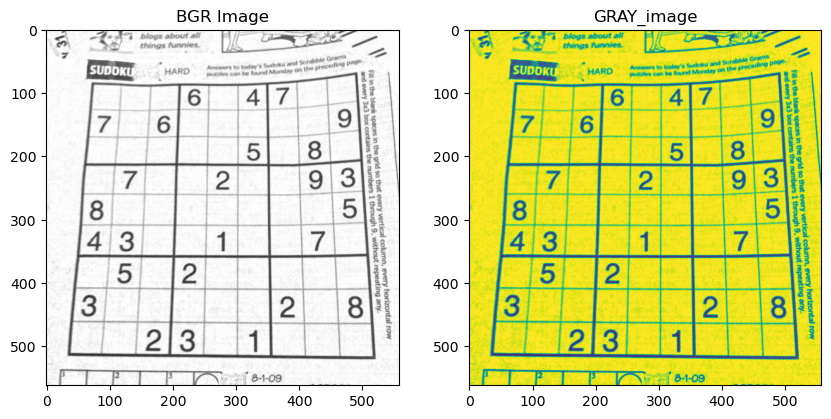

In [35]:
bgr_image = cv2.imread('./images/sudoku.png')
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
showImages(bgr_image, 'BGR Image', gray_image, 'GRAY_image')

# Find Edge using Canny algorithm

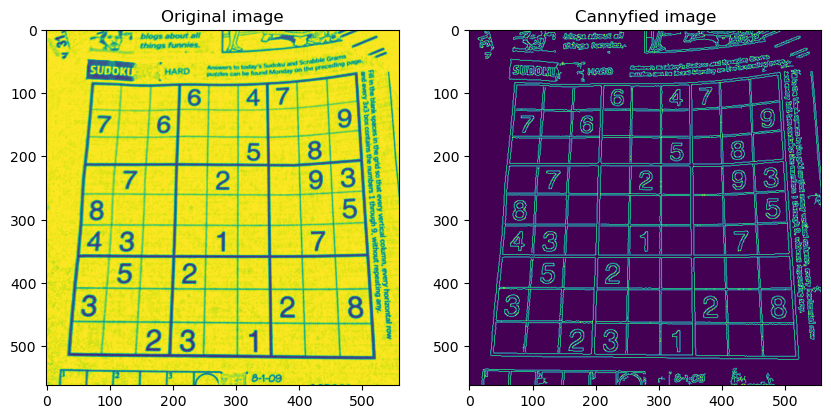

In [36]:
img_edge = cv2.Canny(bgr_image, 10, 255, None, 3)
showImages(gray_image,'Original image', img_edge, 'Cannyfied image')
# cv2.imshow('cannyfied', img_edge)
# cv2.waitKey(0)

# find houghlines

In [37]:
lines = cv2.HoughLines(img_edge, 1, np.pi/180, 220, None, 0, 0)
if lines is not None:
 for i in range(0, len(lines)):
     rho = lines[i][0][0]
     theta = lines[i][0][1]
     a = math.cos(theta)
     b = math.sin(theta)
     x0 = a * rho
     y0 = b * rho
     pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
     pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
     cv2.line(bgr_image, pt1, pt2, (0,0,255), 2, cv2.LINE_4)
# cv2.imshow('houghed', img_houghline)
linesP = cv2.HoughLinesP(img_edge, 1, np.pi/180, 50, None, 50, 10)
# cv2.waitKey(0)

In [38]:
# if linesP is not None:
#  for i in range(0, len(linesP)):
#      l = linesP[i][0]
#      cv2.line(bgr_image, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

In [39]:
len(lines)

29

In [40]:
cv2.imshow('linep', bgr_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# find grid

Total number of lines detected: 36


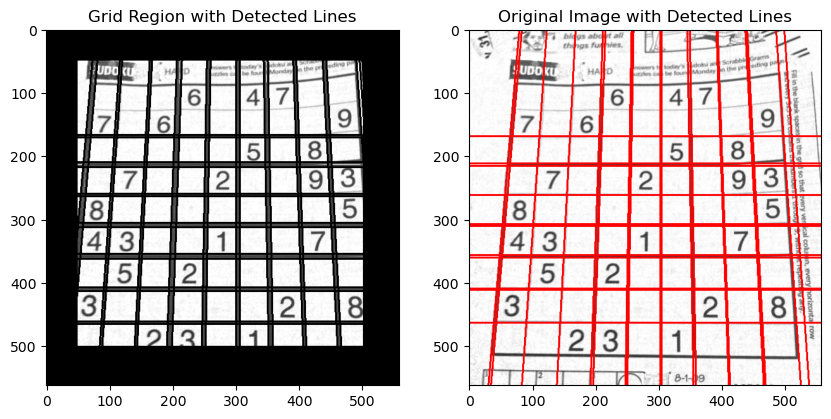

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Step 2: Convert to grayscale
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Canny edge detection
first_threshold = 10
second_threshold = 255
edges = cv2.Canny(gray_image, first_threshold, second_threshold)

# Step 4: Detect Hough Lines
min_votes = 100
distance_resolution = 1
angle_resolution = np.pi / 180
lines = cv2.HoughLines(edges, 1, np.pi/180, 220, None, 0, 0)

# Step 5: Define a function to draw lines
def draw_lines(image, lines):
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2) 
        
# Step 5: Define a function to extract grid region
def extract_grid_region(image):
    # Define vertices of the grid region
    vertices = np.array([[50, 50], [50, 500], [500, 500], [500, 50]], np.int32)
    
    # Create a mask and fill the region outside the vertices
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, [vertices], 255)
    
    # Bitwise AND the mask with the image to extract the grid region
    extracted_region = cv2.bitwise_and(image, mask)
    return extracted_region

# Extract grid region from the grayscale image
grid_region = extract_grid_region(gray_image)

# Step 6: Print the total number of lines detected
num_lines = len(lines)
print(f"Total number of lines detected: {num_lines}")

# Step 7: Draw detected lines on the grid region
draw_lines(grid_region, lines)

# Display the grid region along with detected lines using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(grid_region, cmap='gray')
plt.title('Grid Region with Detected Lines')

plt.subplot(122)
plt.imshow(cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Detected Lines')
draw_lines(bgr_image, lines)

plt.show()


# Find circles in car image

Total number of tires detected: 2


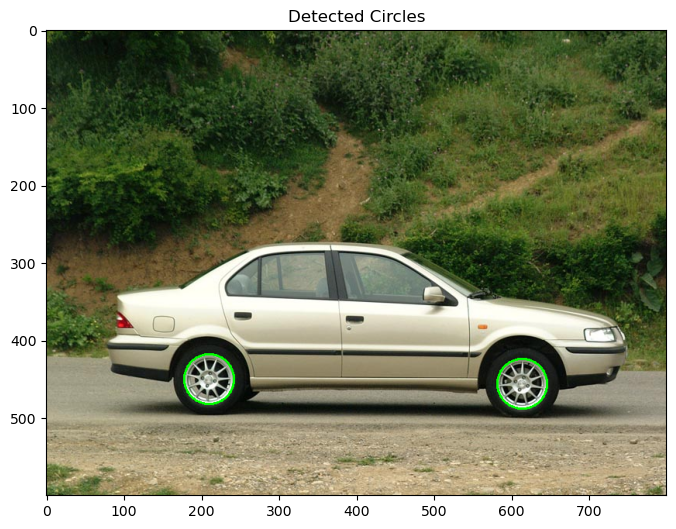

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 11: Load the color image
image_path = "./images/car.jpg"
color_image = cv2.imread(image_path)

# Step 12: Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Step 13: Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Step 14: Find the tires using HoughCircles
resolution = 1
min_center_distance = 20
canny_high_threshold = 50
min_votes = 70
max_radius = 80
circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    resolution,
    min_center_distance,
    param1=canny_high_threshold,
    param2=min_votes,
    minRadius=1,
    maxRadius=max_radius
)

# Step 15: Define a function to draw circles
def draw_circles(image, circles):
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(image, center, radius, (0, 255, 0), 2)  # Draw green circles

# Step 16: Print the total number of detected tires
if circles is not None:
    num_tires = len(circles[0])
    print(f"Total number of tires detected: {num_tires}")
else:
    print("No tires detected.")

# Step 17: Plot the image along with detected circles
plt.figure(figsize=(8, 8))
draw_circles(color_image, circles)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles')
plt.show()


# Find coin

Total number of tires detected: 11


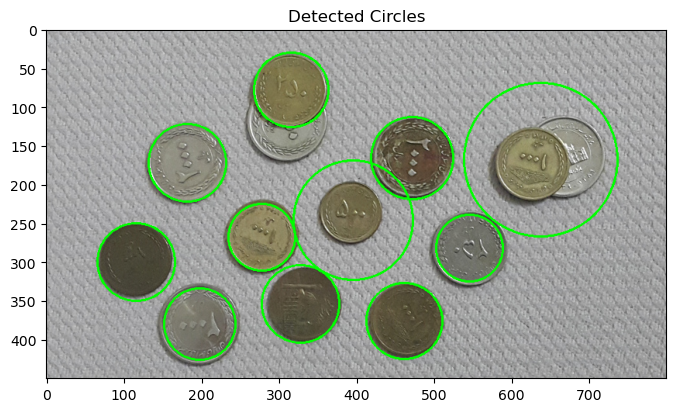

In [97]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 11: Load the color image
image_path = "./images/coins.jpg"
color_image = cv2.imread(image_path)

# Step 12: Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Step 13: Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Step 14: Find the tires using HoughCircles
resolution = 1
min_center_distance = 100
canny_high_threshold = 100
min_votes = 54
max_radius = 100
circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    resolution,
    min_center_distance,
    param1=canny_high_threshold,
    param2=min_votes,
    minRadius=21,
    maxRadius=max_radius
)

# Step 15: Define a function to draw circles
def draw_circles(image, circles):
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(image, center, radius, (0, 255, 0), 2)  # Draw green circles

# Step 16: Print the total number of detected tires
if circles is not None:
    num_tires = len(circles[0])
    print(f"Total number of tires detected: {num_tires}")
else:
    print("No tires detected.")

# Step 17: Plot the image along with detected circles
plt.figure(figsize=(8, 8))
draw_circles(color_image, circles)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Circles')
plt.show()


# Find corners in chess board

Total number of corners detected: 5873


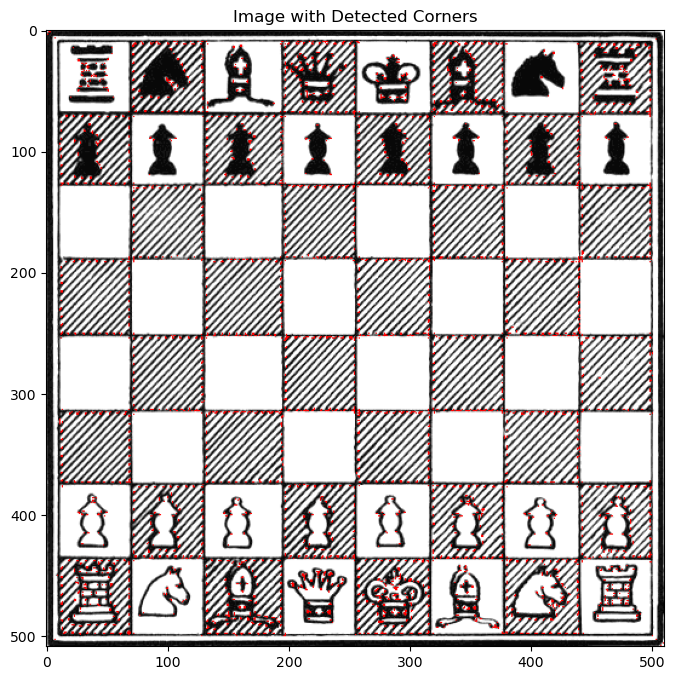

In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 24: Load the color image
image_path = "./images/chess_board.png"
color_image = cv2.imread(image_path)

# Step 25: Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Step 26: Find corners using cornerHarris
window_size = 2
sobel_kernel_size = 3
free_parameter = 0.08
corners = cv2.cornerHarris(gray_image, window_size, sobel_kernel_size, free_parameter)

# Step 27: Print the total number of detected corners
corner_threshold = 0.1 * corners.max()
detected_corners = np.where(corners > corner_threshold)
num_corners = len(detected_corners[0])
print(f"Total number of corners detected: {num_corners}")

# Step 28: Plot the image along with detected corners
plt.figure(figsize=(8, 8))

# Mark detected corners with red color
color_image[detected_corners] = [0, 0, 255]

plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))

plt.title('Image with Detected Corners')
plt.show()
